## Steps :
- Import Libraries
- Load Dataset
- EDA
- Data Preprocessing
- Model Building
- Diagnostics
- Forcasting
- Conclusion

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# Load The Dataset and Parse the Date
df=pd.read_csv('exchange_rate.csv',
               parse_dates=True)
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


## EDA

In [3]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


In [4]:
# Split the 'date' column into two new columns: 'date' and 'time'
df[['date', 'time']] = df['date'].str.split(' ', expand=True)

# Check the result
df.head()


,date,Ex_rate,time
0,01-01-1990,0.7855,00:00
1,02-01-1990,0.7818,00:00
2,03-01-1990,0.7867,00:00
3,04-01-1990,0.7860,00:00
4,05-01-1990,0.7849,00:00


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [6]:
df

,date,Ex_rate,time
0,1990-01-01,0.785500,00:00
1,1990-01-02,0.781800,00:00
2,1990-01-03,0.786700,00:00
3,1990-01-04,0.786000,00:00
4,1990-01-05,0.784900,00:00
...,...,...,...
7583,2010-10-06,0.718494,00:00
7584,2010-10-07,0.721839,00:00
7585,2010-10-08,0.723197,00:00
7586,2010-10-09,0.720825,00:00


In [7]:
df.dtypes

date       datetime64[ns]
Ex_rate           float64
time               object
dtype: object

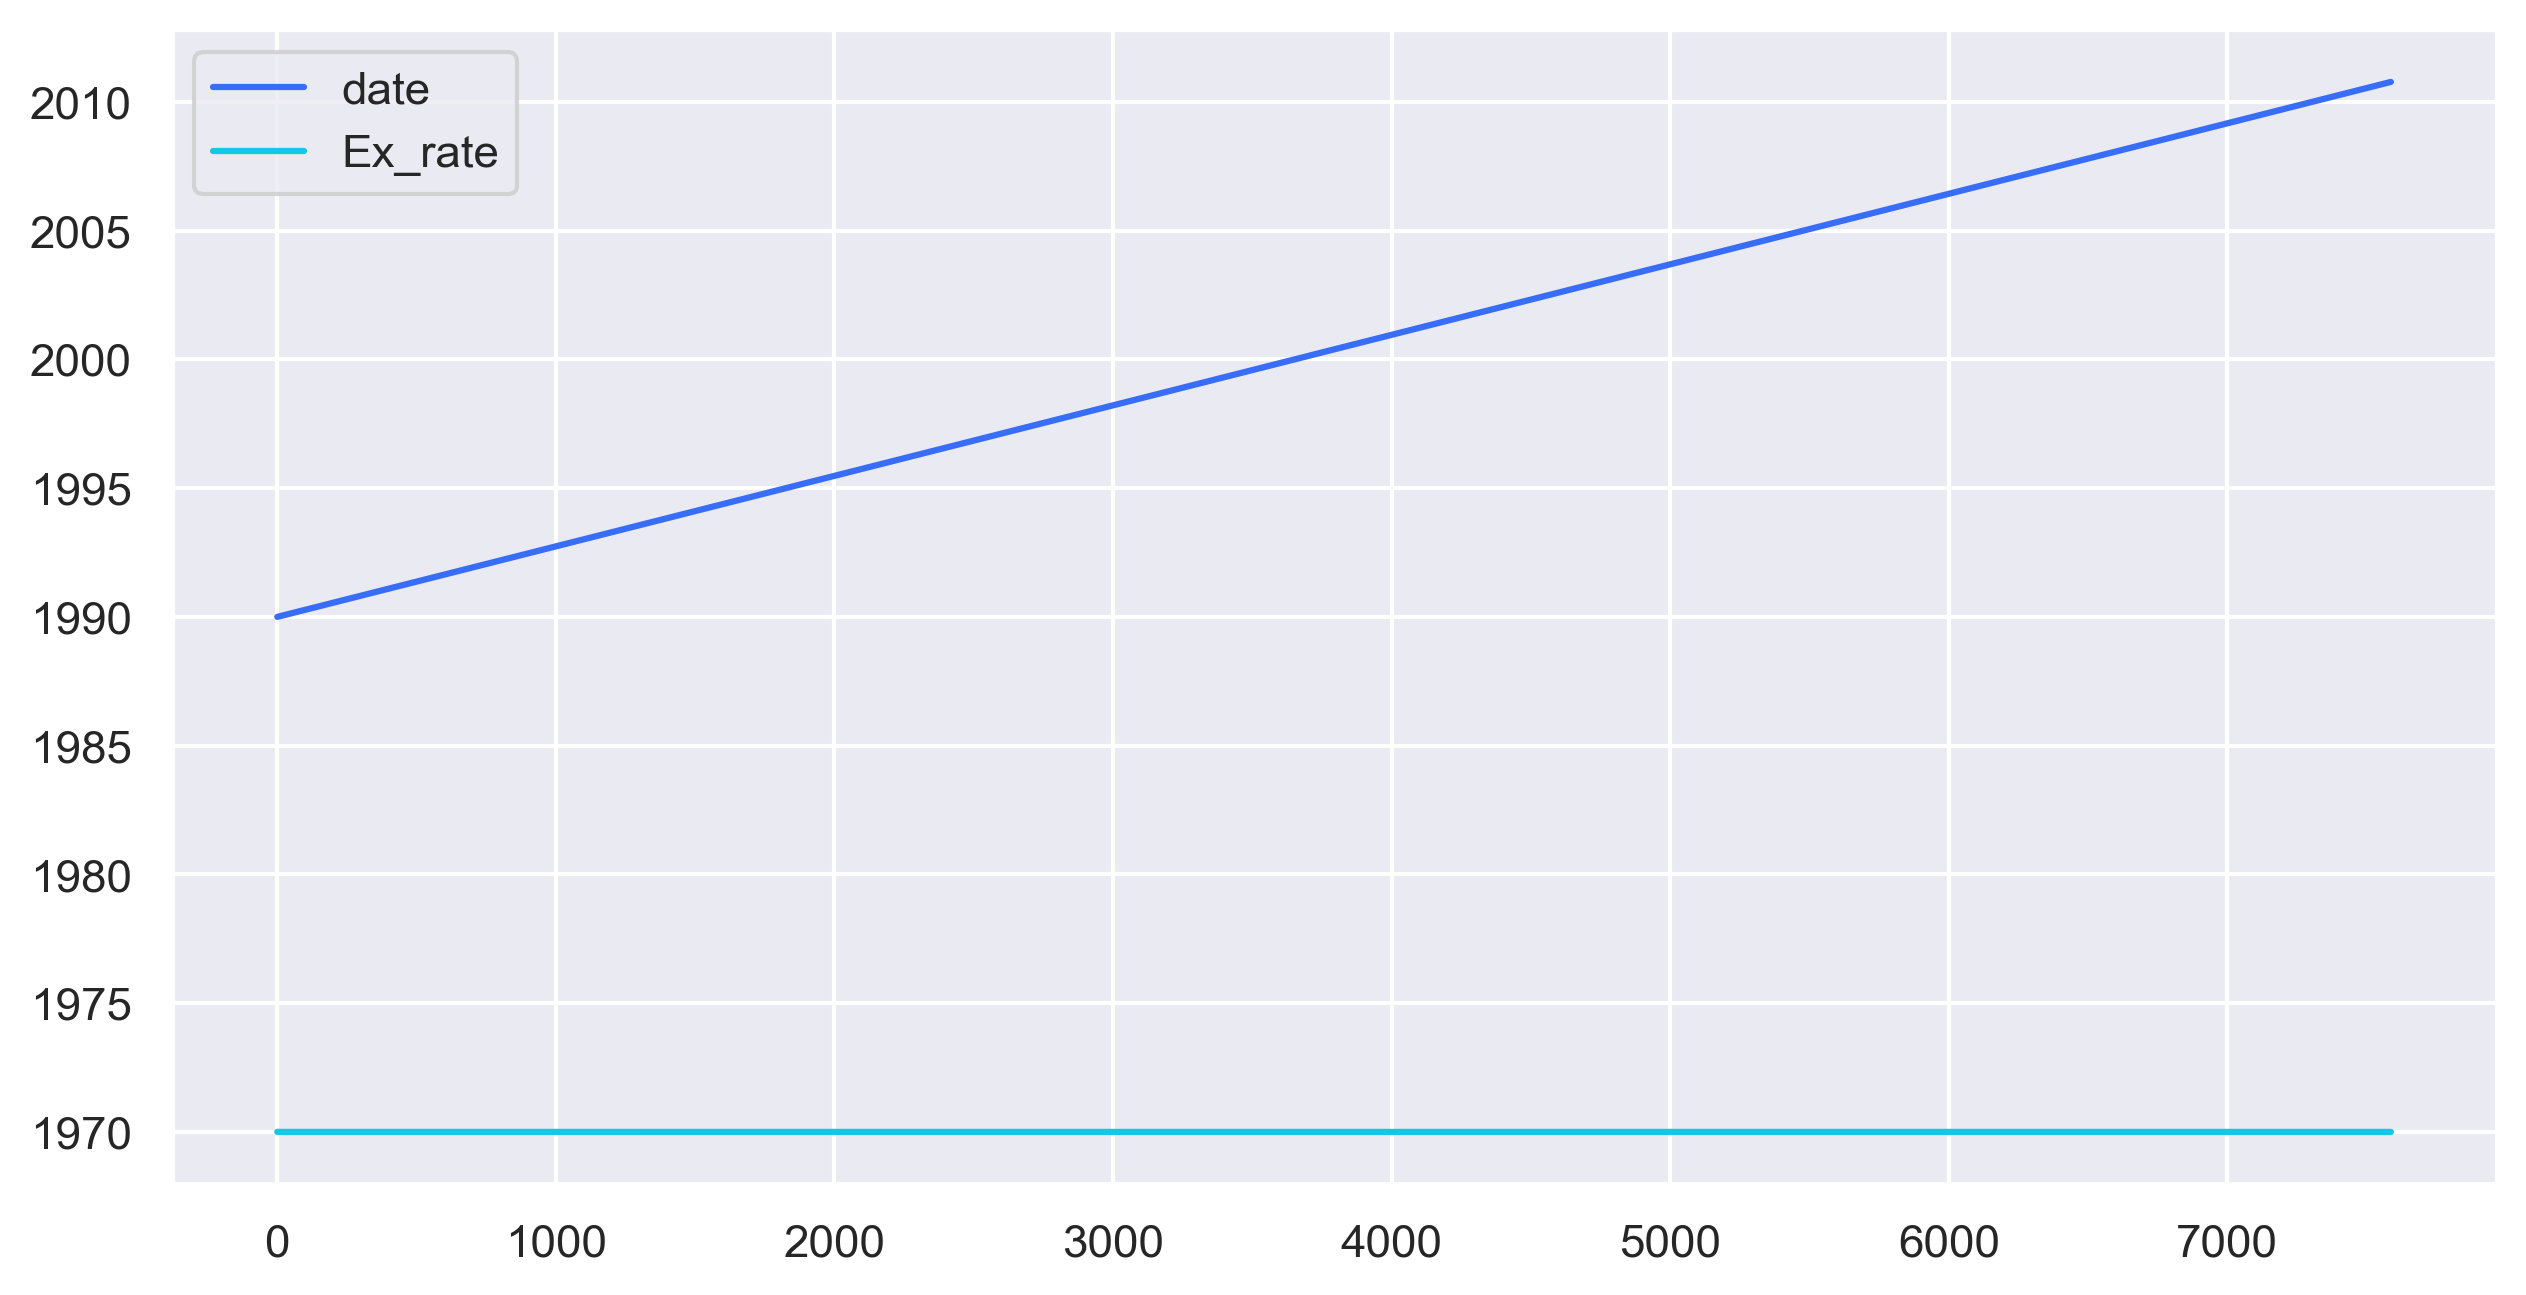

In [8]:
df.plot()
plt.show()

# Data Preprocessing

In [9]:
df.isna().sum()

date       0
Ex_rate    0
time       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
 2   time     7588 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 178.0+ KB


In [11]:
df.describe()

,date,Ex_rate
count,7588,7588.000000
mean,2000-05-21 12:00:00,0.776974
min,1990-01-01 00:00:00,0.483297
25%,1995-03-12 18:00:00,0.701422
50%,2000-05-21 12:00:00,0.761377
75%,2005-07-31 06:00:00,0.873477
max,2010-10-10 00:00:00,1.102536
std,NaN,0.136620


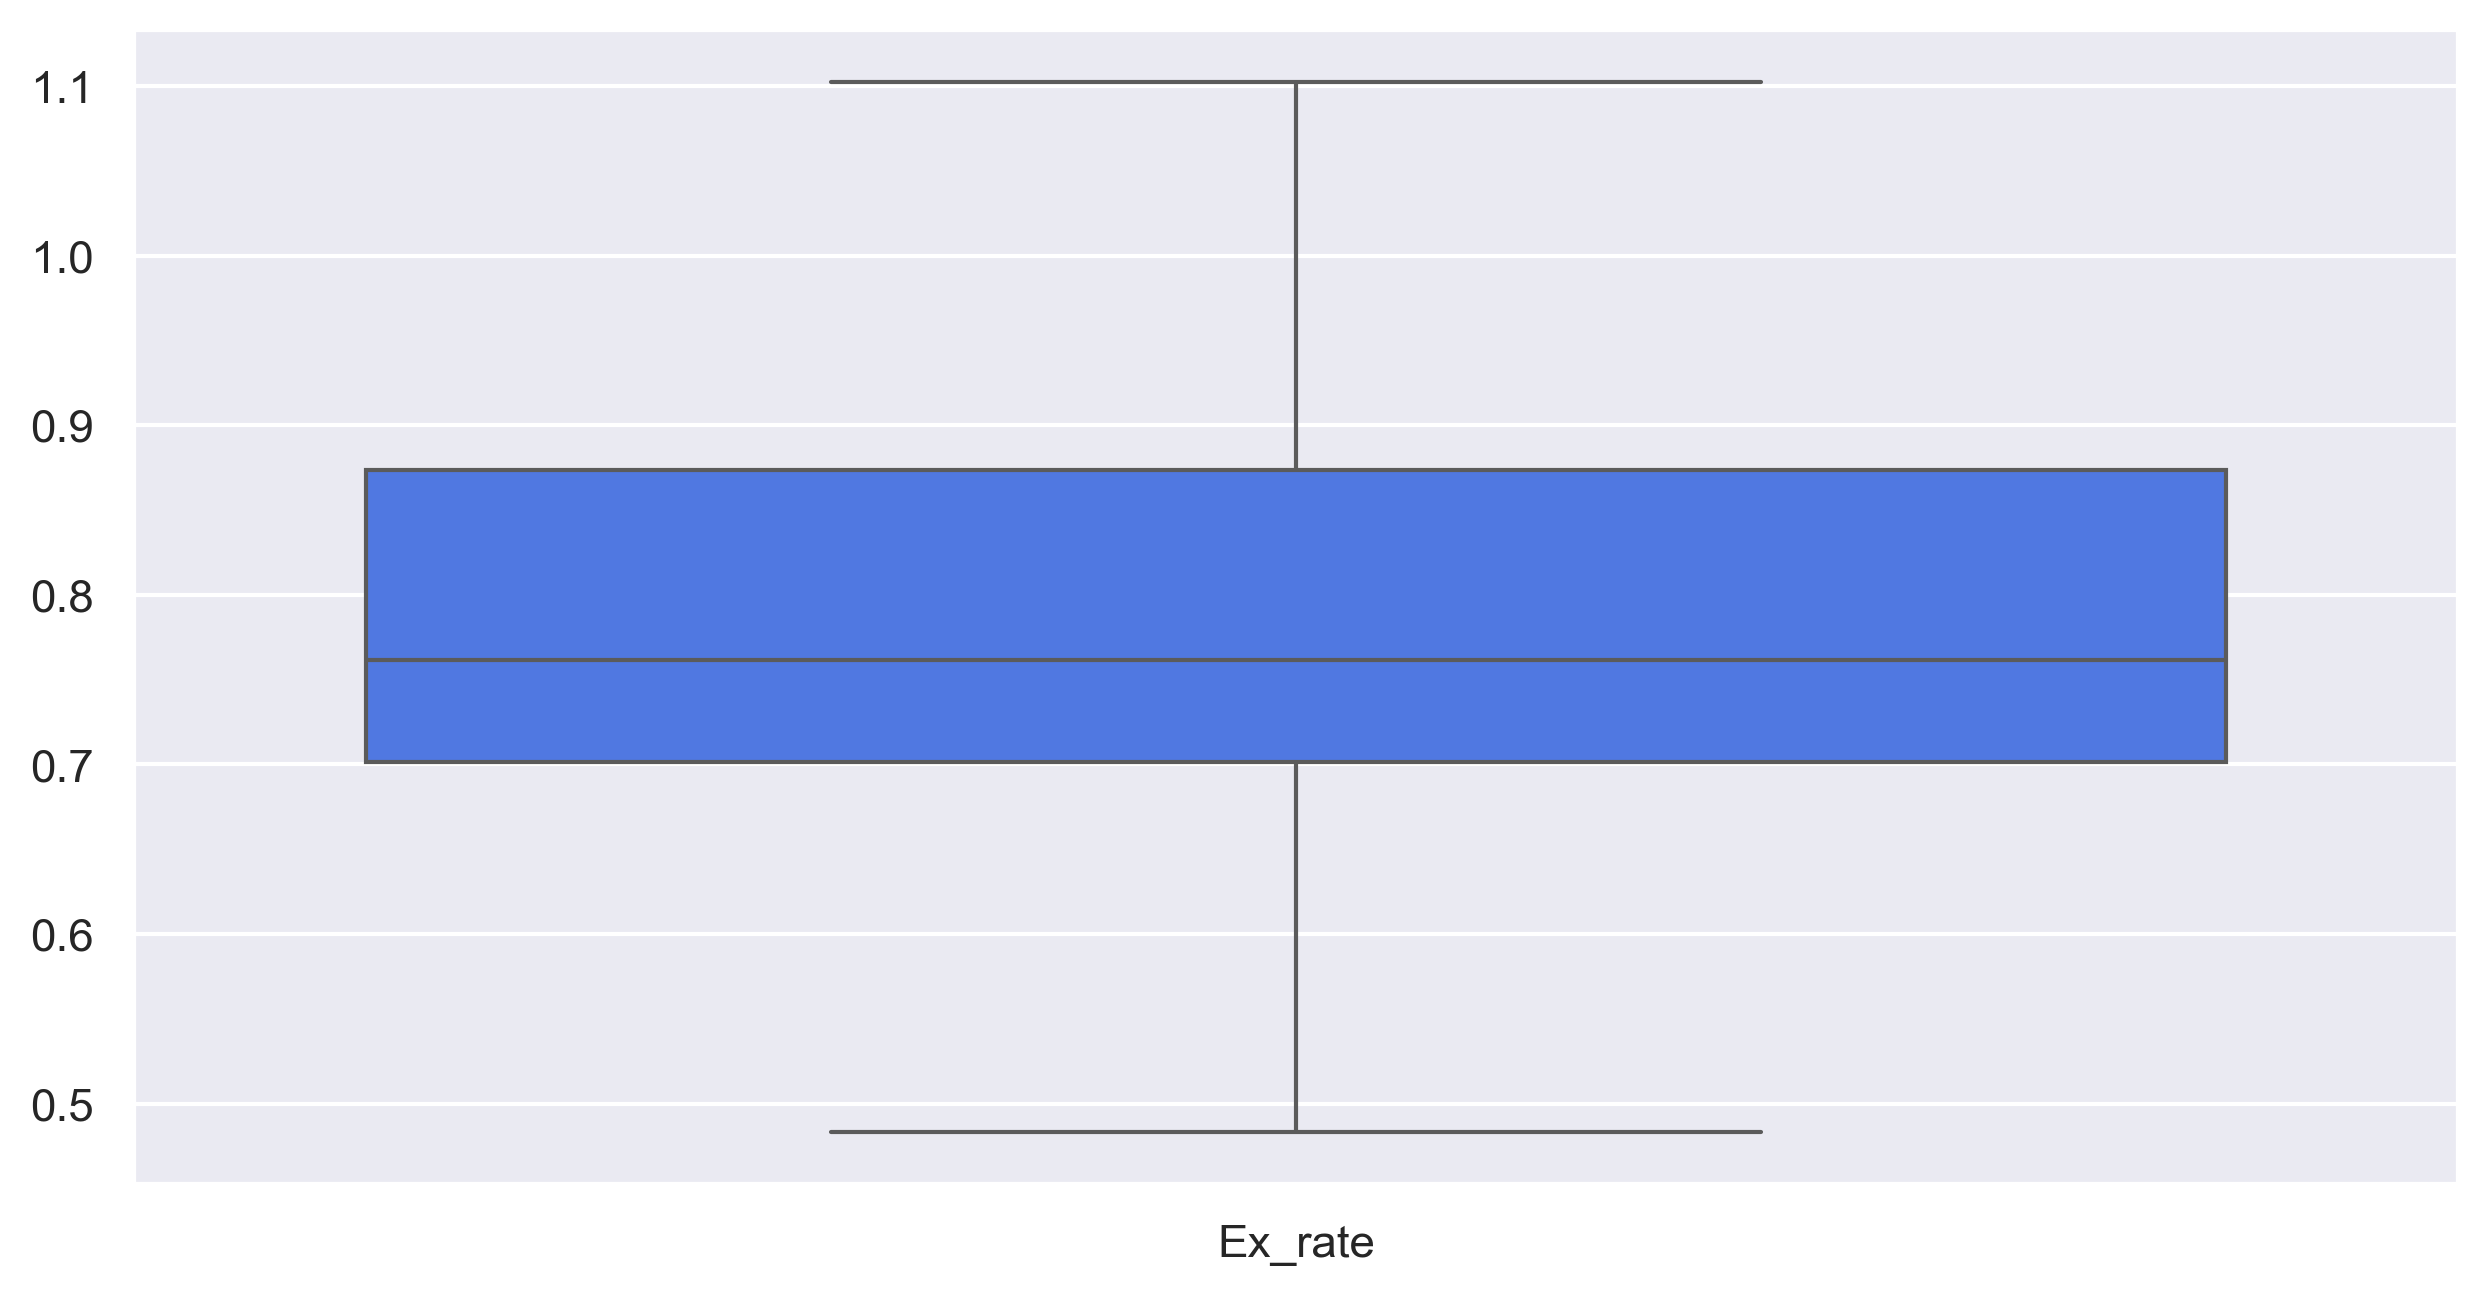

In [12]:
#Boxplot for a specific column to detect outliers
sns.boxplot(df)
plt.show()

In [13]:
df.drop(columns=['time'],inplace=True)

In [14]:
df['date'].unique()

<DatetimeArray>
['1990-01-01 00:00:00', '1990-01-02 00:00:00', '1990-01-03 00:00:00',
 '1990-01-04 00:00:00', '1990-01-05 00:00:00', '1990-01-06 00:00:00',
 '1990-01-07 00:00:00', '1990-01-08 00:00:00', '1990-01-09 00:00:00',
 '1990-01-10 00:00:00',
 ...
 '2010-10-01 00:00:00', '2010-10-02 00:00:00', '2010-10-03 00:00:00',
 '2010-10-04 00:00:00', '2010-10-05 00:00:00', '2010-10-06 00:00:00',
 '2010-10-07 00:00:00', '2010-10-08 00:00:00', '2010-10-09 00:00:00',
 '2010-10-10 00:00:00']
Length: 7588, dtype: datetime64[ns]

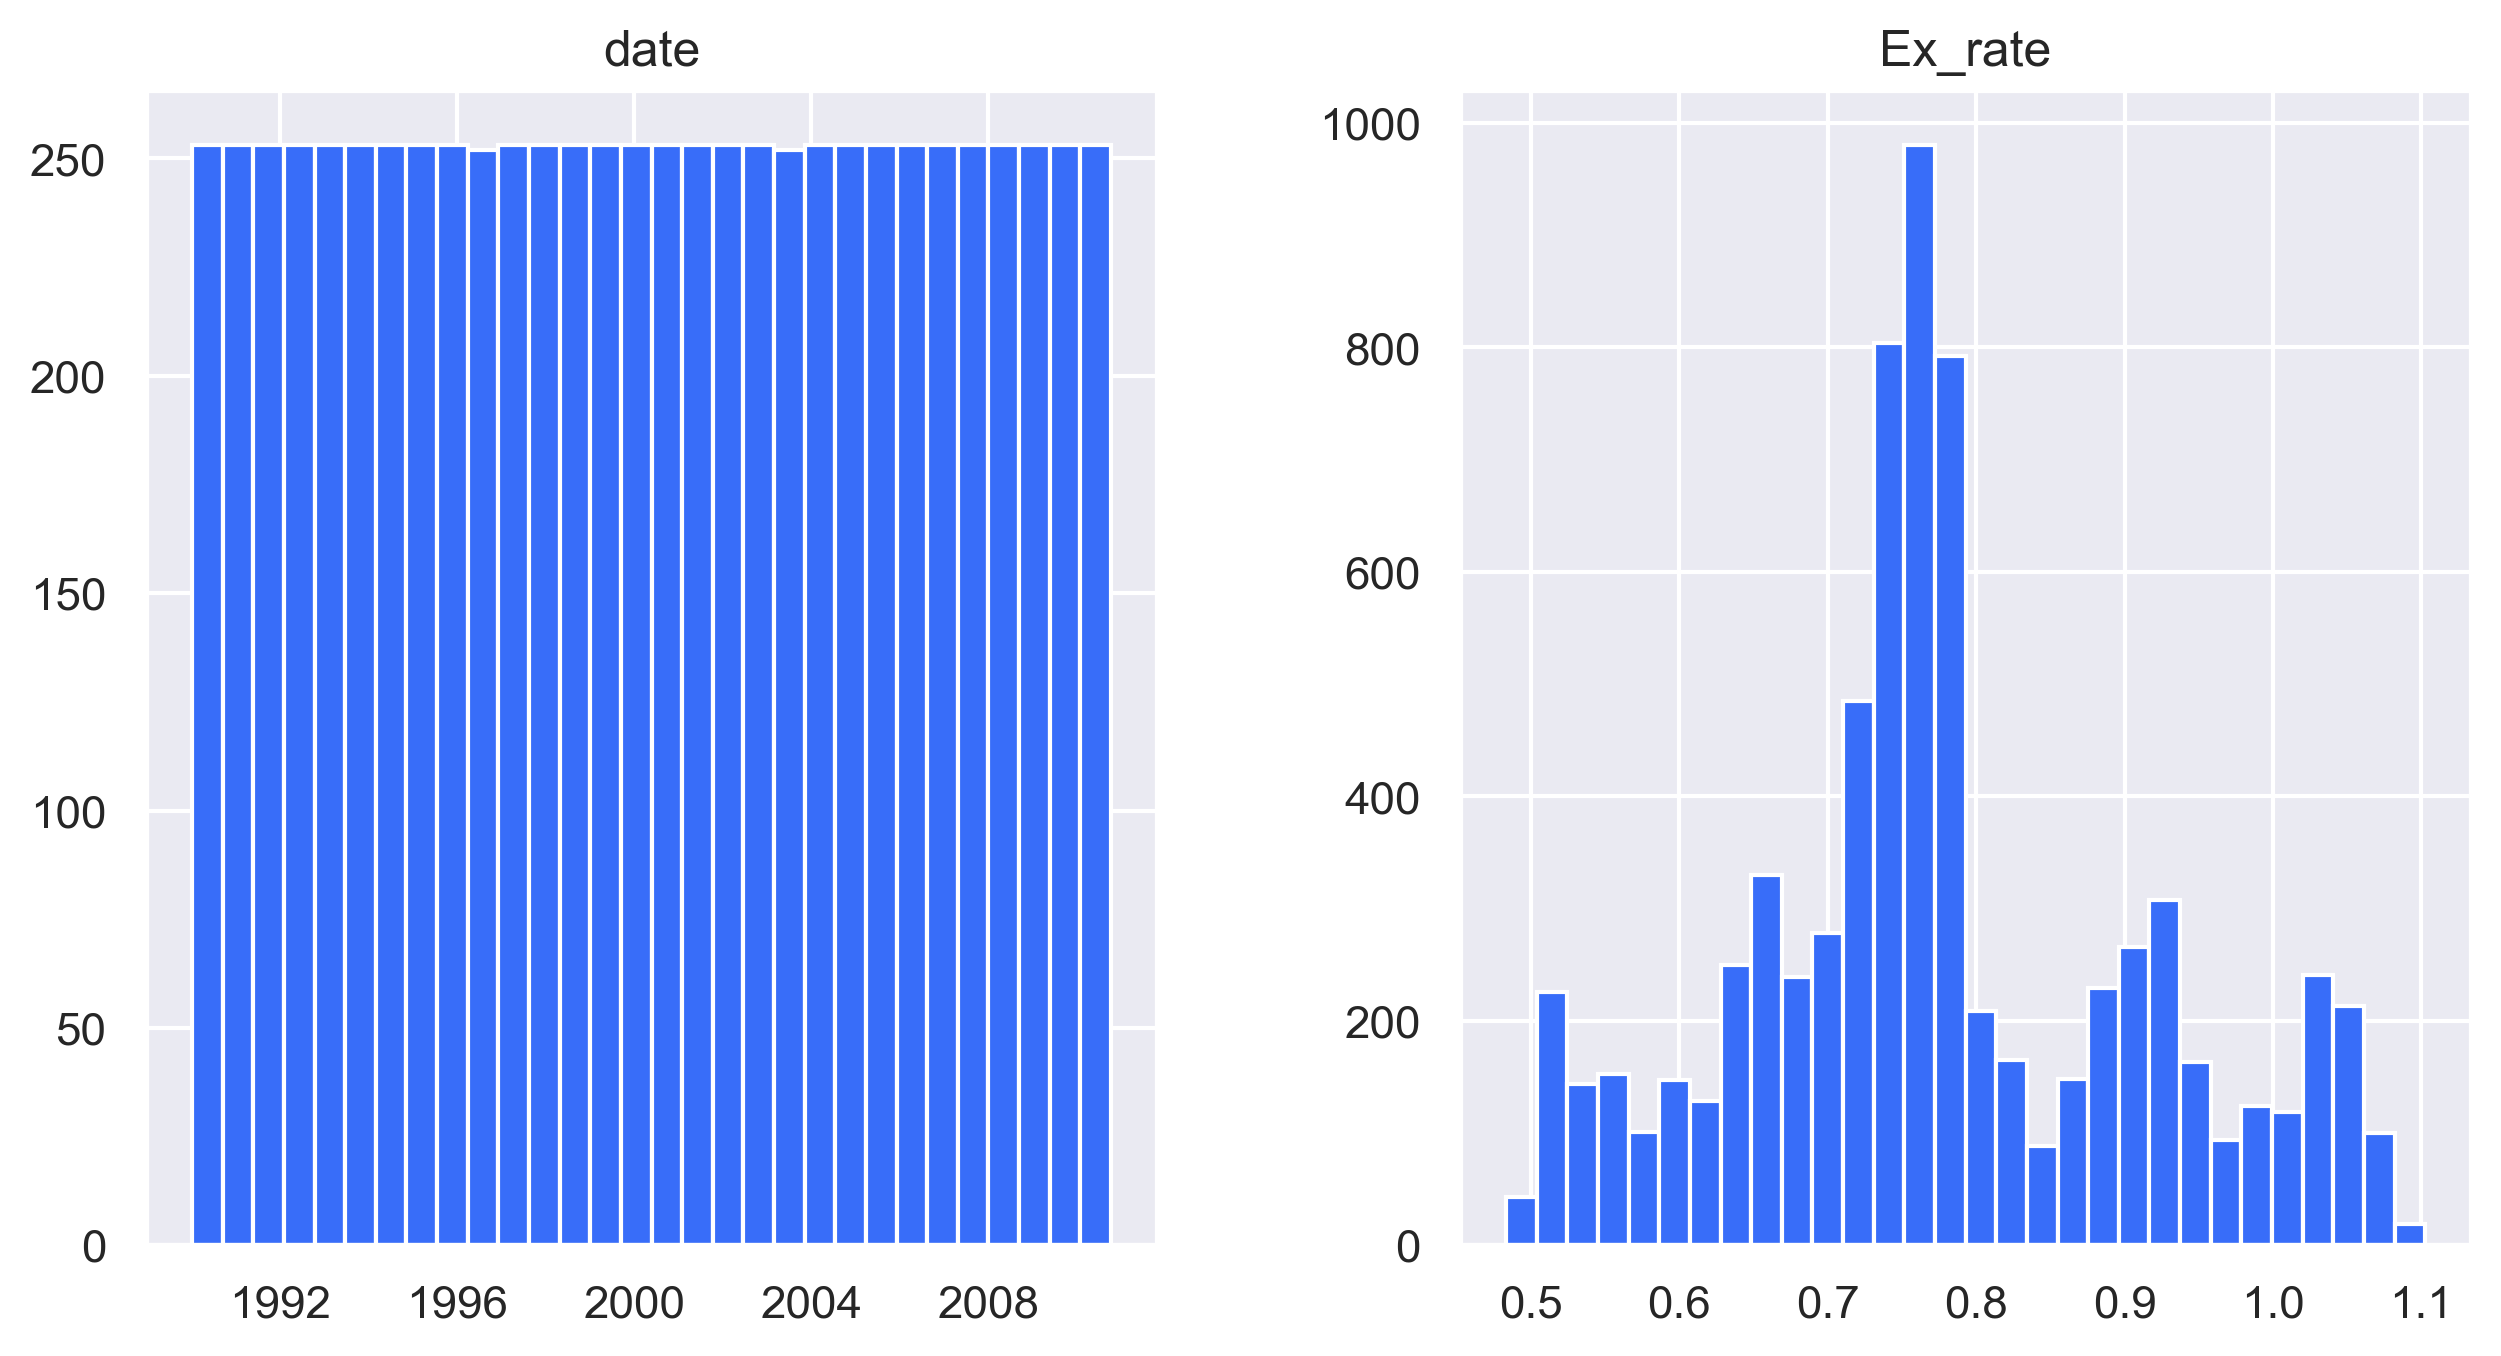

In [15]:
df.hist(bins=30)
plt.show()

In [16]:
# To make data stationary

In [17]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Ex_rate'])[1]

0.4492327353598314

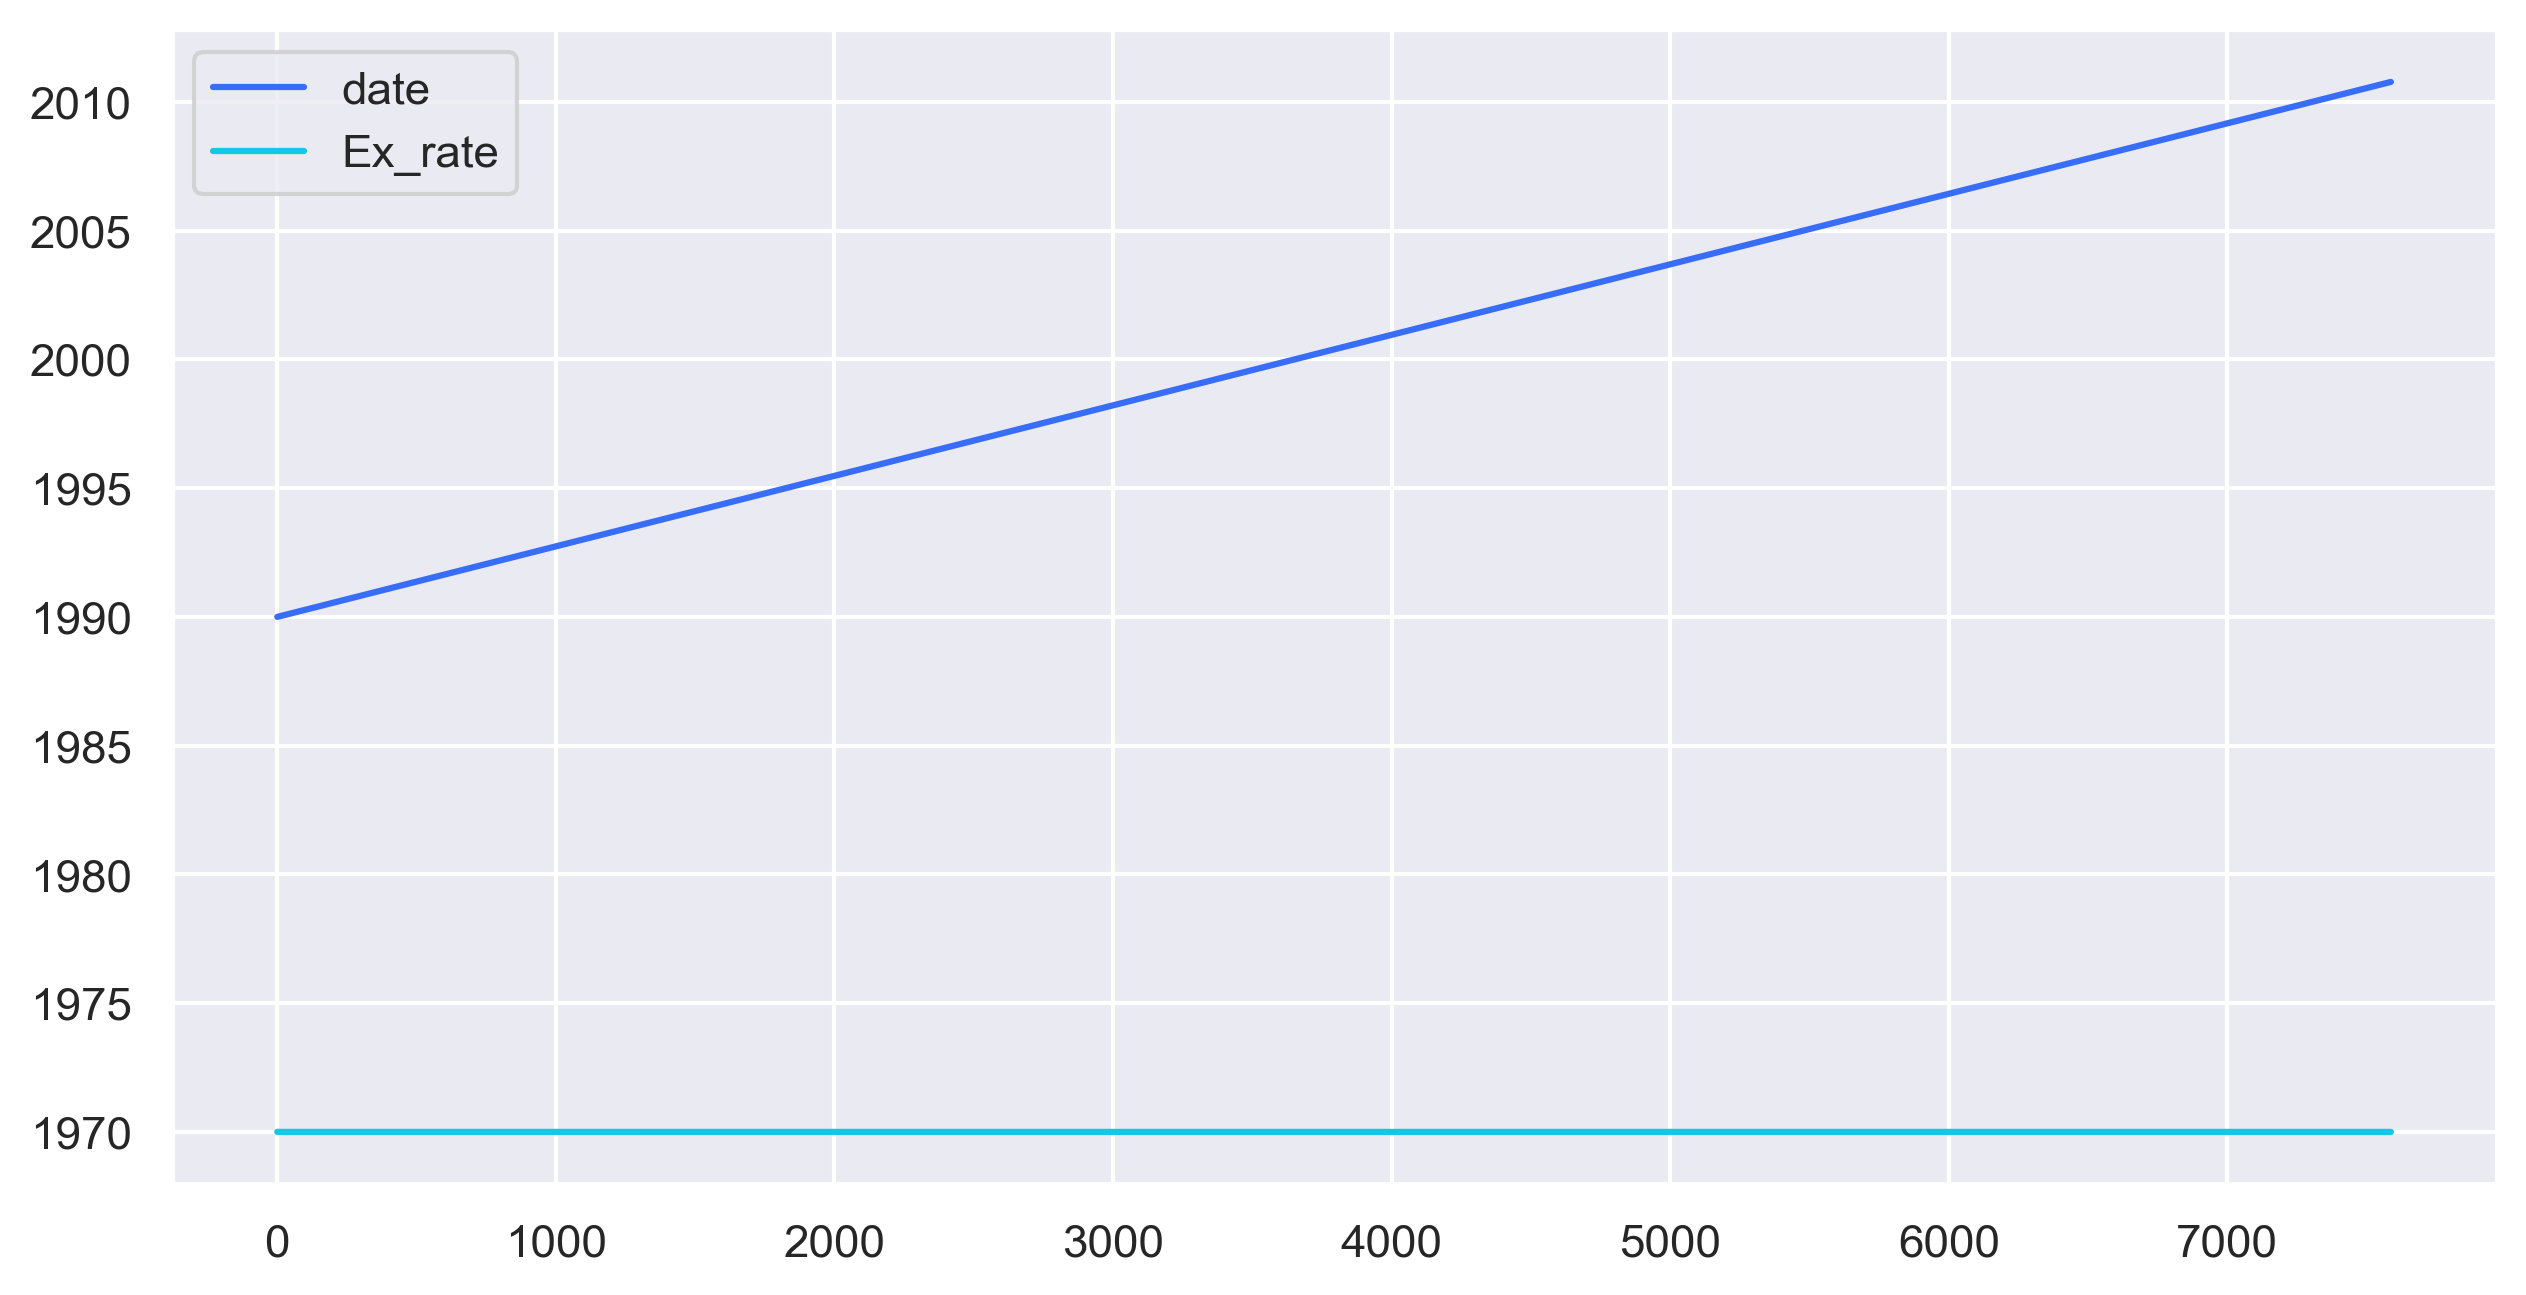

In [18]:
df.plot()
plt.show()

# Model Building

In [19]:
import numpy as np
# First, make sure it's numeric and then apply the log transformation
ts_log = np.log(df['Ex_rate'])

# Apply differencing to remove trend
ts_log_diff = ts_log.diff().dropna()

# Now, apply ACF and PACF on the differenced data
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

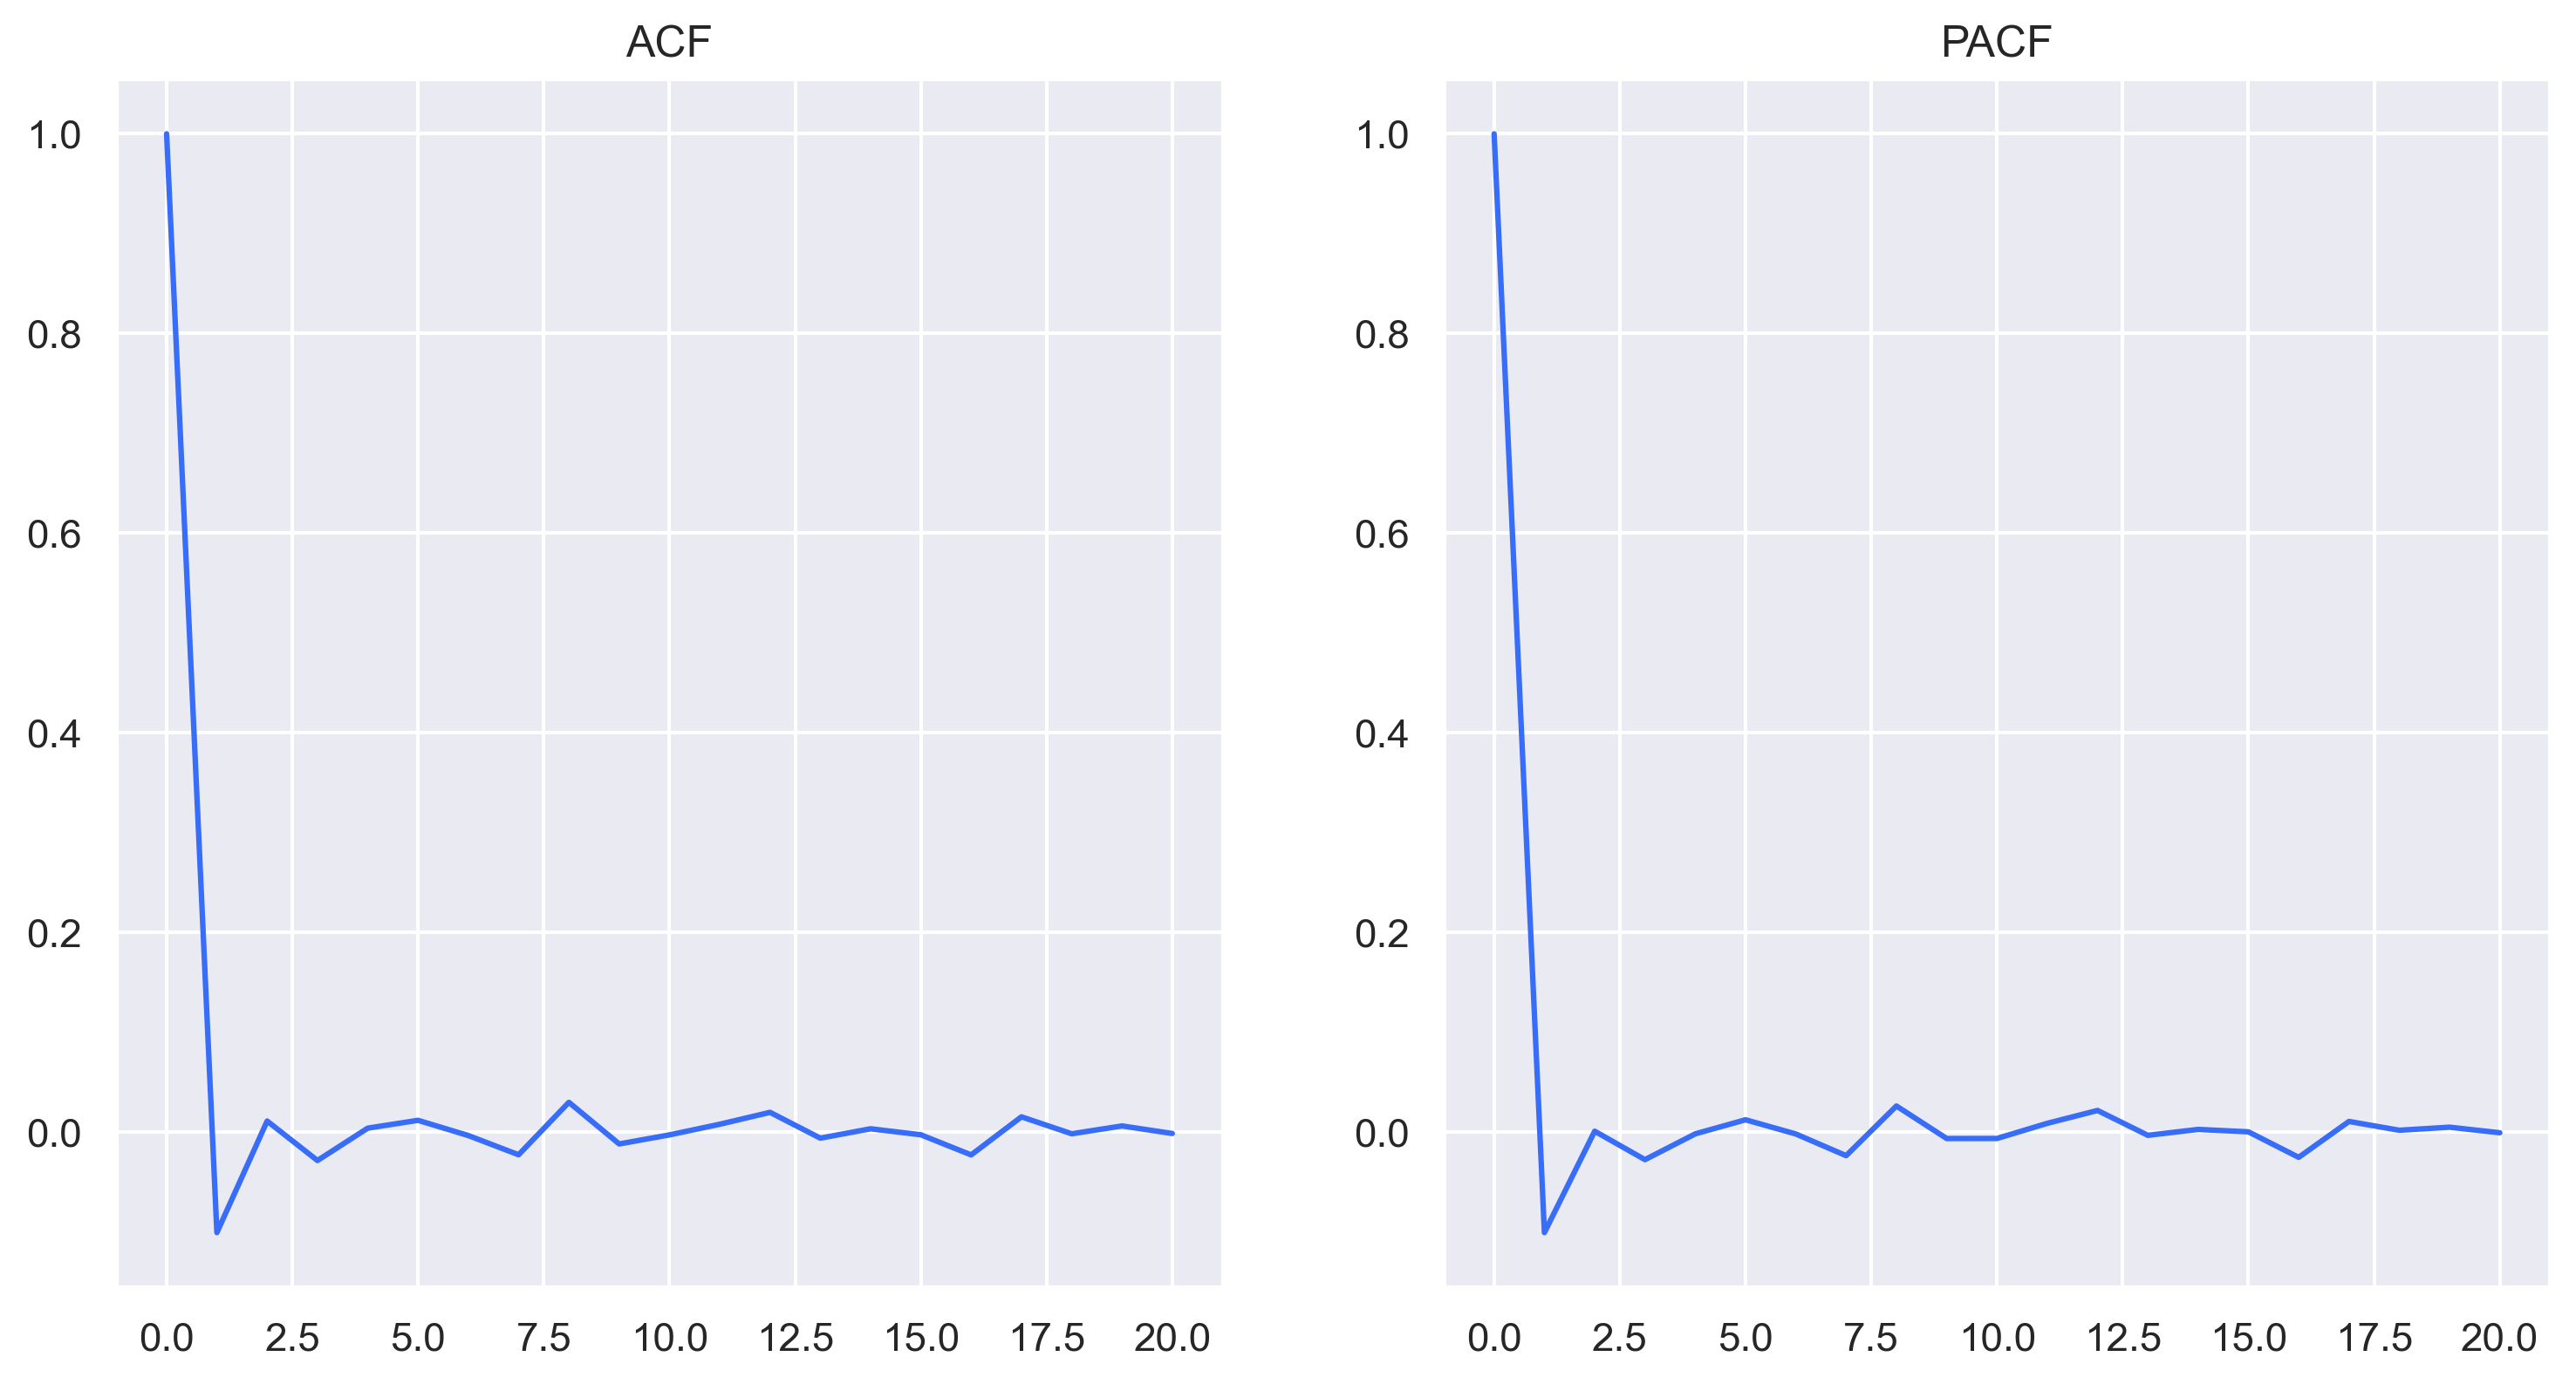

In [20]:
# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('PACF')
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [22]:
order=auto_arima(df['Ex_rate'])
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [23]:
df.shape

(7588, 2)

In [24]:
# split the data

In [25]:
train = df.iloc[:-20]
test  = df.iloc[-20:] 

In [26]:
train.shape

(7568, 2)

In [27]:
train

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7563,2010-09-16,0.744602
7564,2010-09-17,0.744158
7565,2010-09-18,0.745184
7566,2010-09-19,0.744990


In [28]:
test.shape

(20, 2)

In [29]:
# Arima model

In [30]:
model = ARIMA(train['Ex_rate'], order=(0,0,1)).fit()

In [31]:
#Evoluating the model

In [32]:
test

,date,Ex_rate
7568,2010-09-21,0.749681
7569,2010-09-22,0.751654
7570,2010-09-23,0.733999
7571,2010-09-24,0.730567
7572,2010-09-25,0.729714
7573,2010-09-26,0.729714
7574,2010-09-27,0.726533
7575,2010-09-28,0.725058
7576,2010-09-29,0.724506
7577,2010-09-30,0.721553


In [33]:
train

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7563,2010-09-16,0.744602
7564,2010-09-17,0.744158
7565,2010-09-18,0.745184
7566,2010-09-19,0.744990


In [34]:
ypred = model.predict(start =1990, end =2009)
ypred

1990    0.723944
1991    0.729355
1992    0.717853
1993    0.728477
1994    0.717928
1995    0.728887
1996    0.717339
1997    0.730905
1998    0.724081
1999    0.724877
2000    0.725557
2001    0.717368
2002    0.724214
2003    0.719438
2004    0.725015
2005    0.725520
2006    0.723488
2007    0.729506
2008    0.723501
2009    0.718774
Name: predicted_mean, dtype: float64

In [35]:
import numpy as np

In [36]:
test_ex_rate_aligned = test['Ex_rate'][:len(ypred)]
print(np.sqrt(mean_squared_error(test_ex_rate_aligned, ypred)))

0.00982227526905701


# 	Diagnostics

In [37]:
# Resdiual
from statsmodels.tsa.arima.model import ARIMA

# Define parameters (replace p, d, q with your selected values)
p, d, q = 1, 1, 0  # Example values

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Tue, 31 Dec 2024   AIC                         -56104.319
Time:                        14:32:33   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [38]:
# Extract residuals from the fitted model
residuals = results.resid

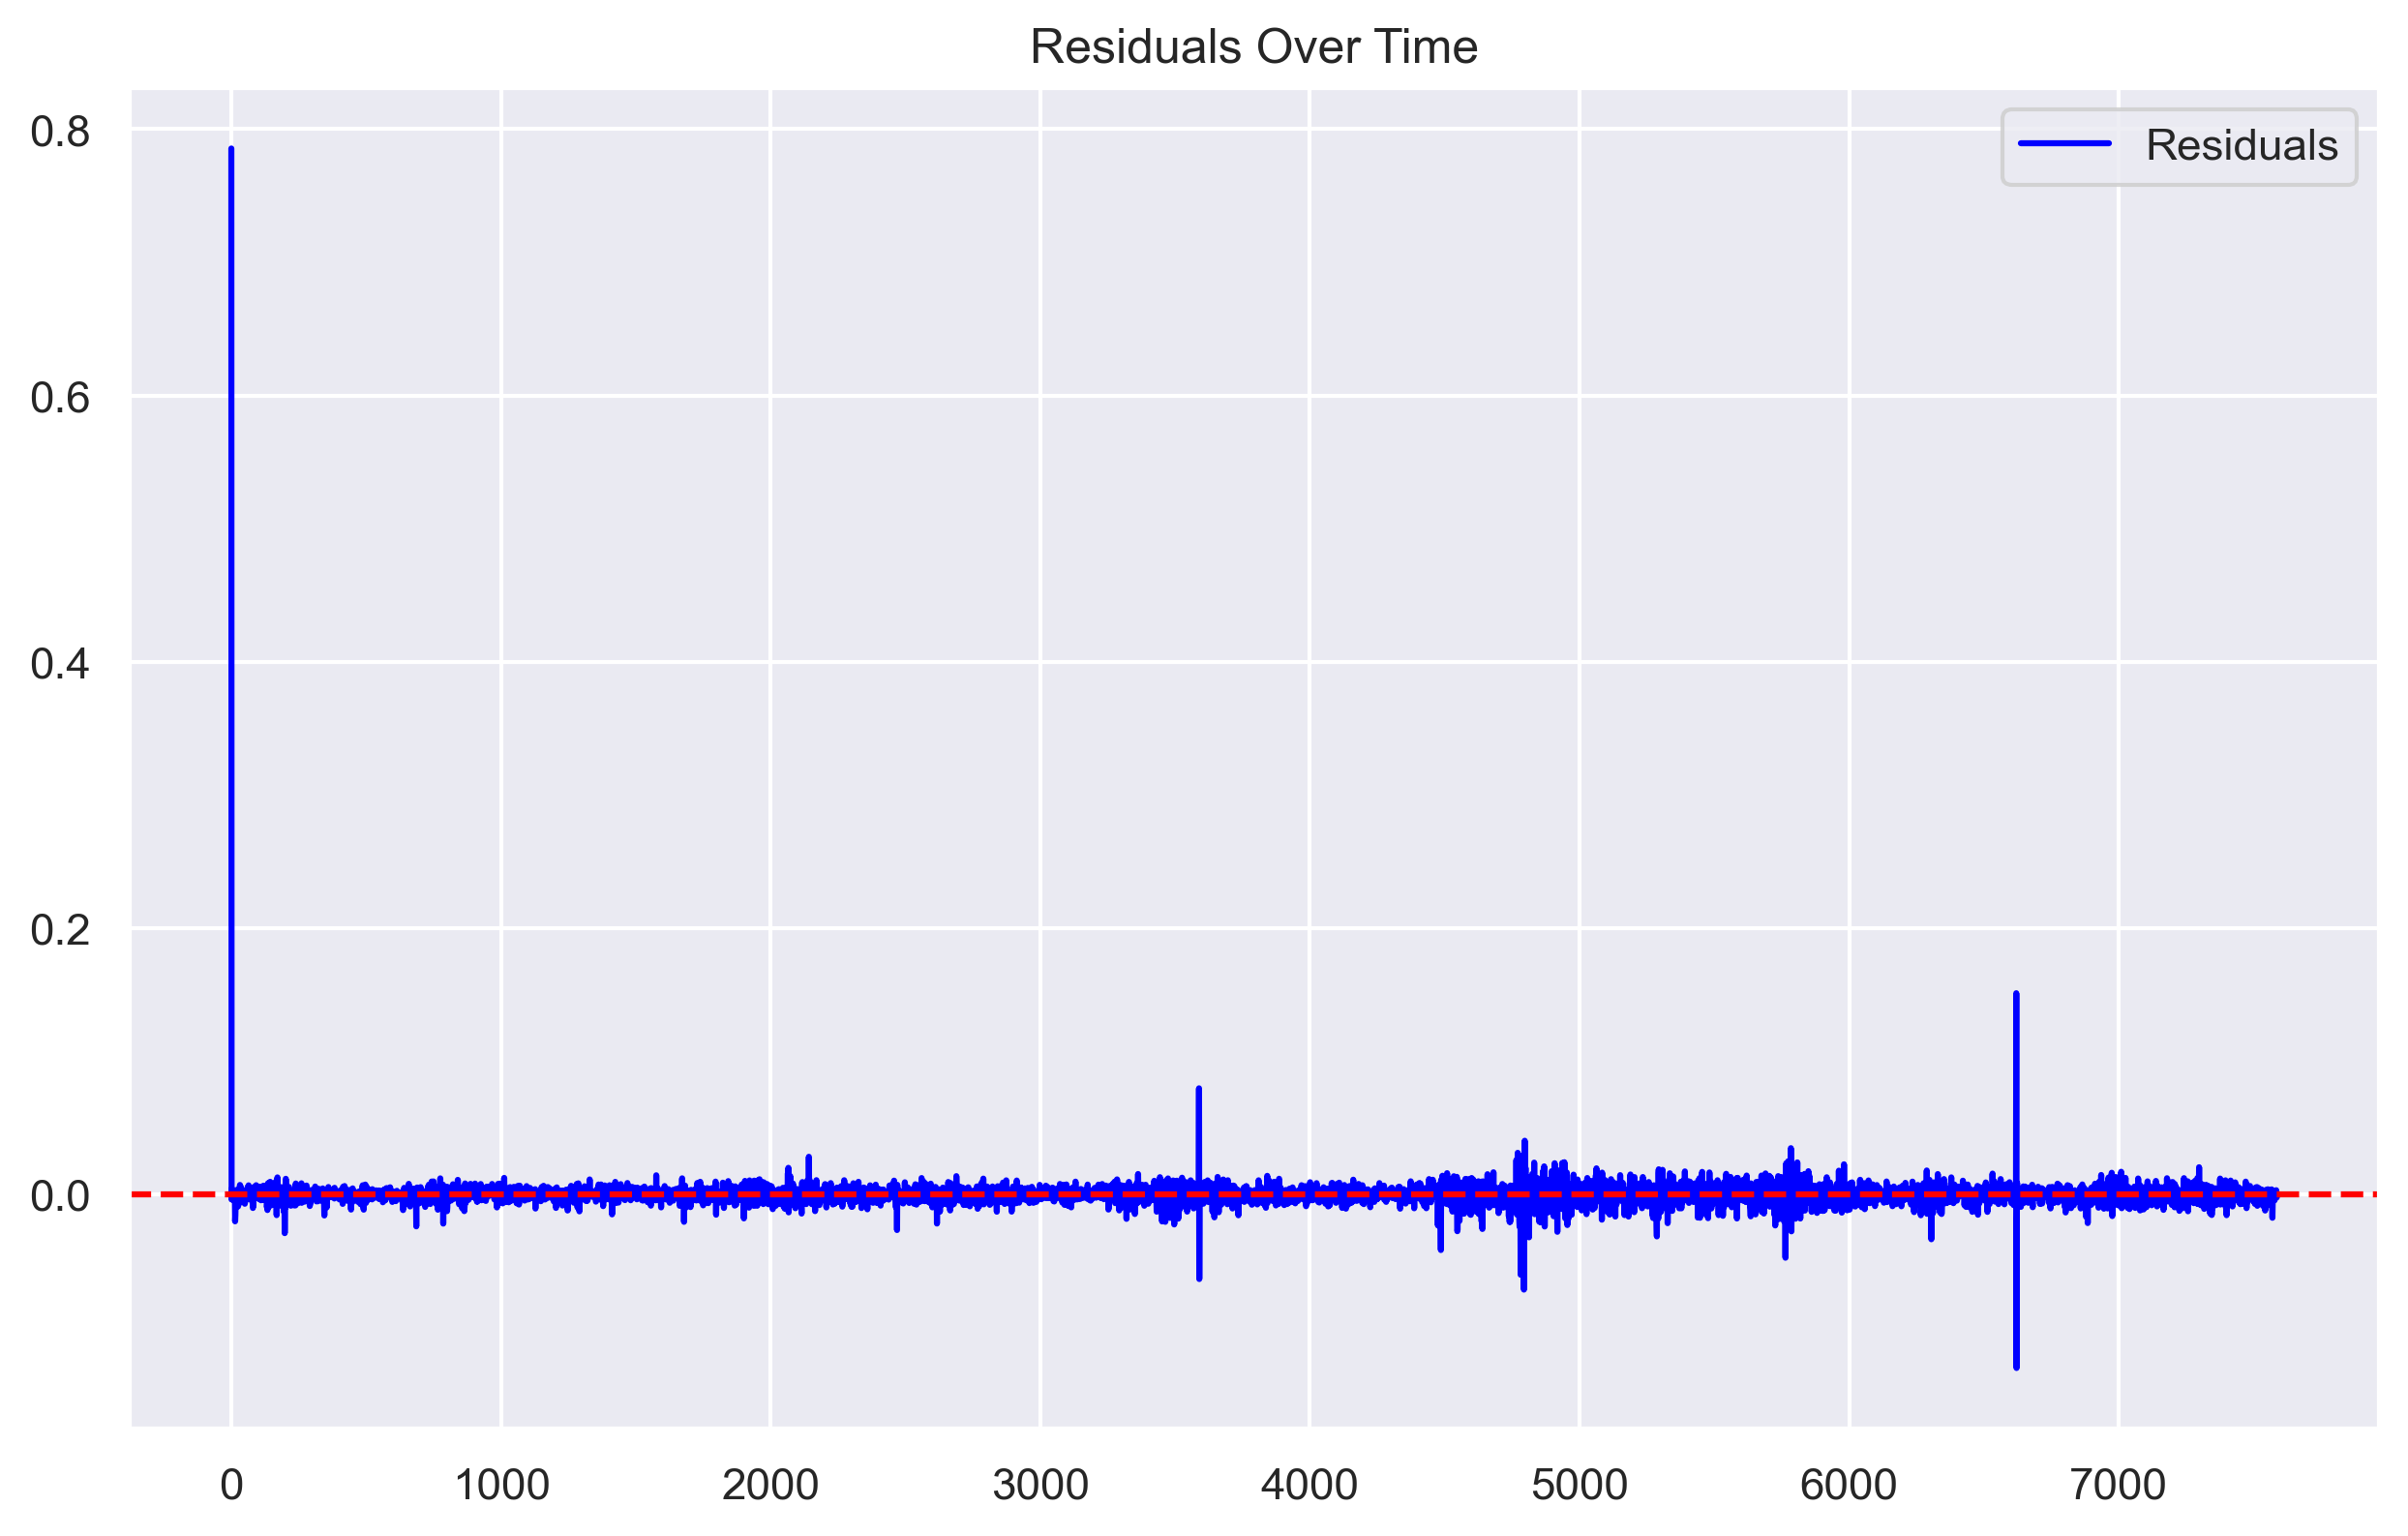

In [39]:

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Over Time')
plt.legend()
plt.show()

# Forcasting

In [40]:
ARIMA_prediction = pd.Series( results.fittedvalues,copy = True)
print(ARIMA_prediction.head())

0    0.000000
1    0.785500
2    0.782286
3    0.786056
4    0.786092
dtype: float64


In [41]:
ARIMA_prediction_cumsum = ARIMA_prediction.cumsum()
print(ARIMA_prediction.head()) # why cumsum -because have taken the difference of our time series

0    0.000000
1    0.785500
2    0.782286
3    0.786056
4    0.786092
dtype: float64


In [42]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_prediction_cumsum, fill_value=0)
ARIMA_log_prediction.head()

0   -0.241435
1    0.544065
2    1.326351
3    2.112408
4    2.898499
dtype: float64

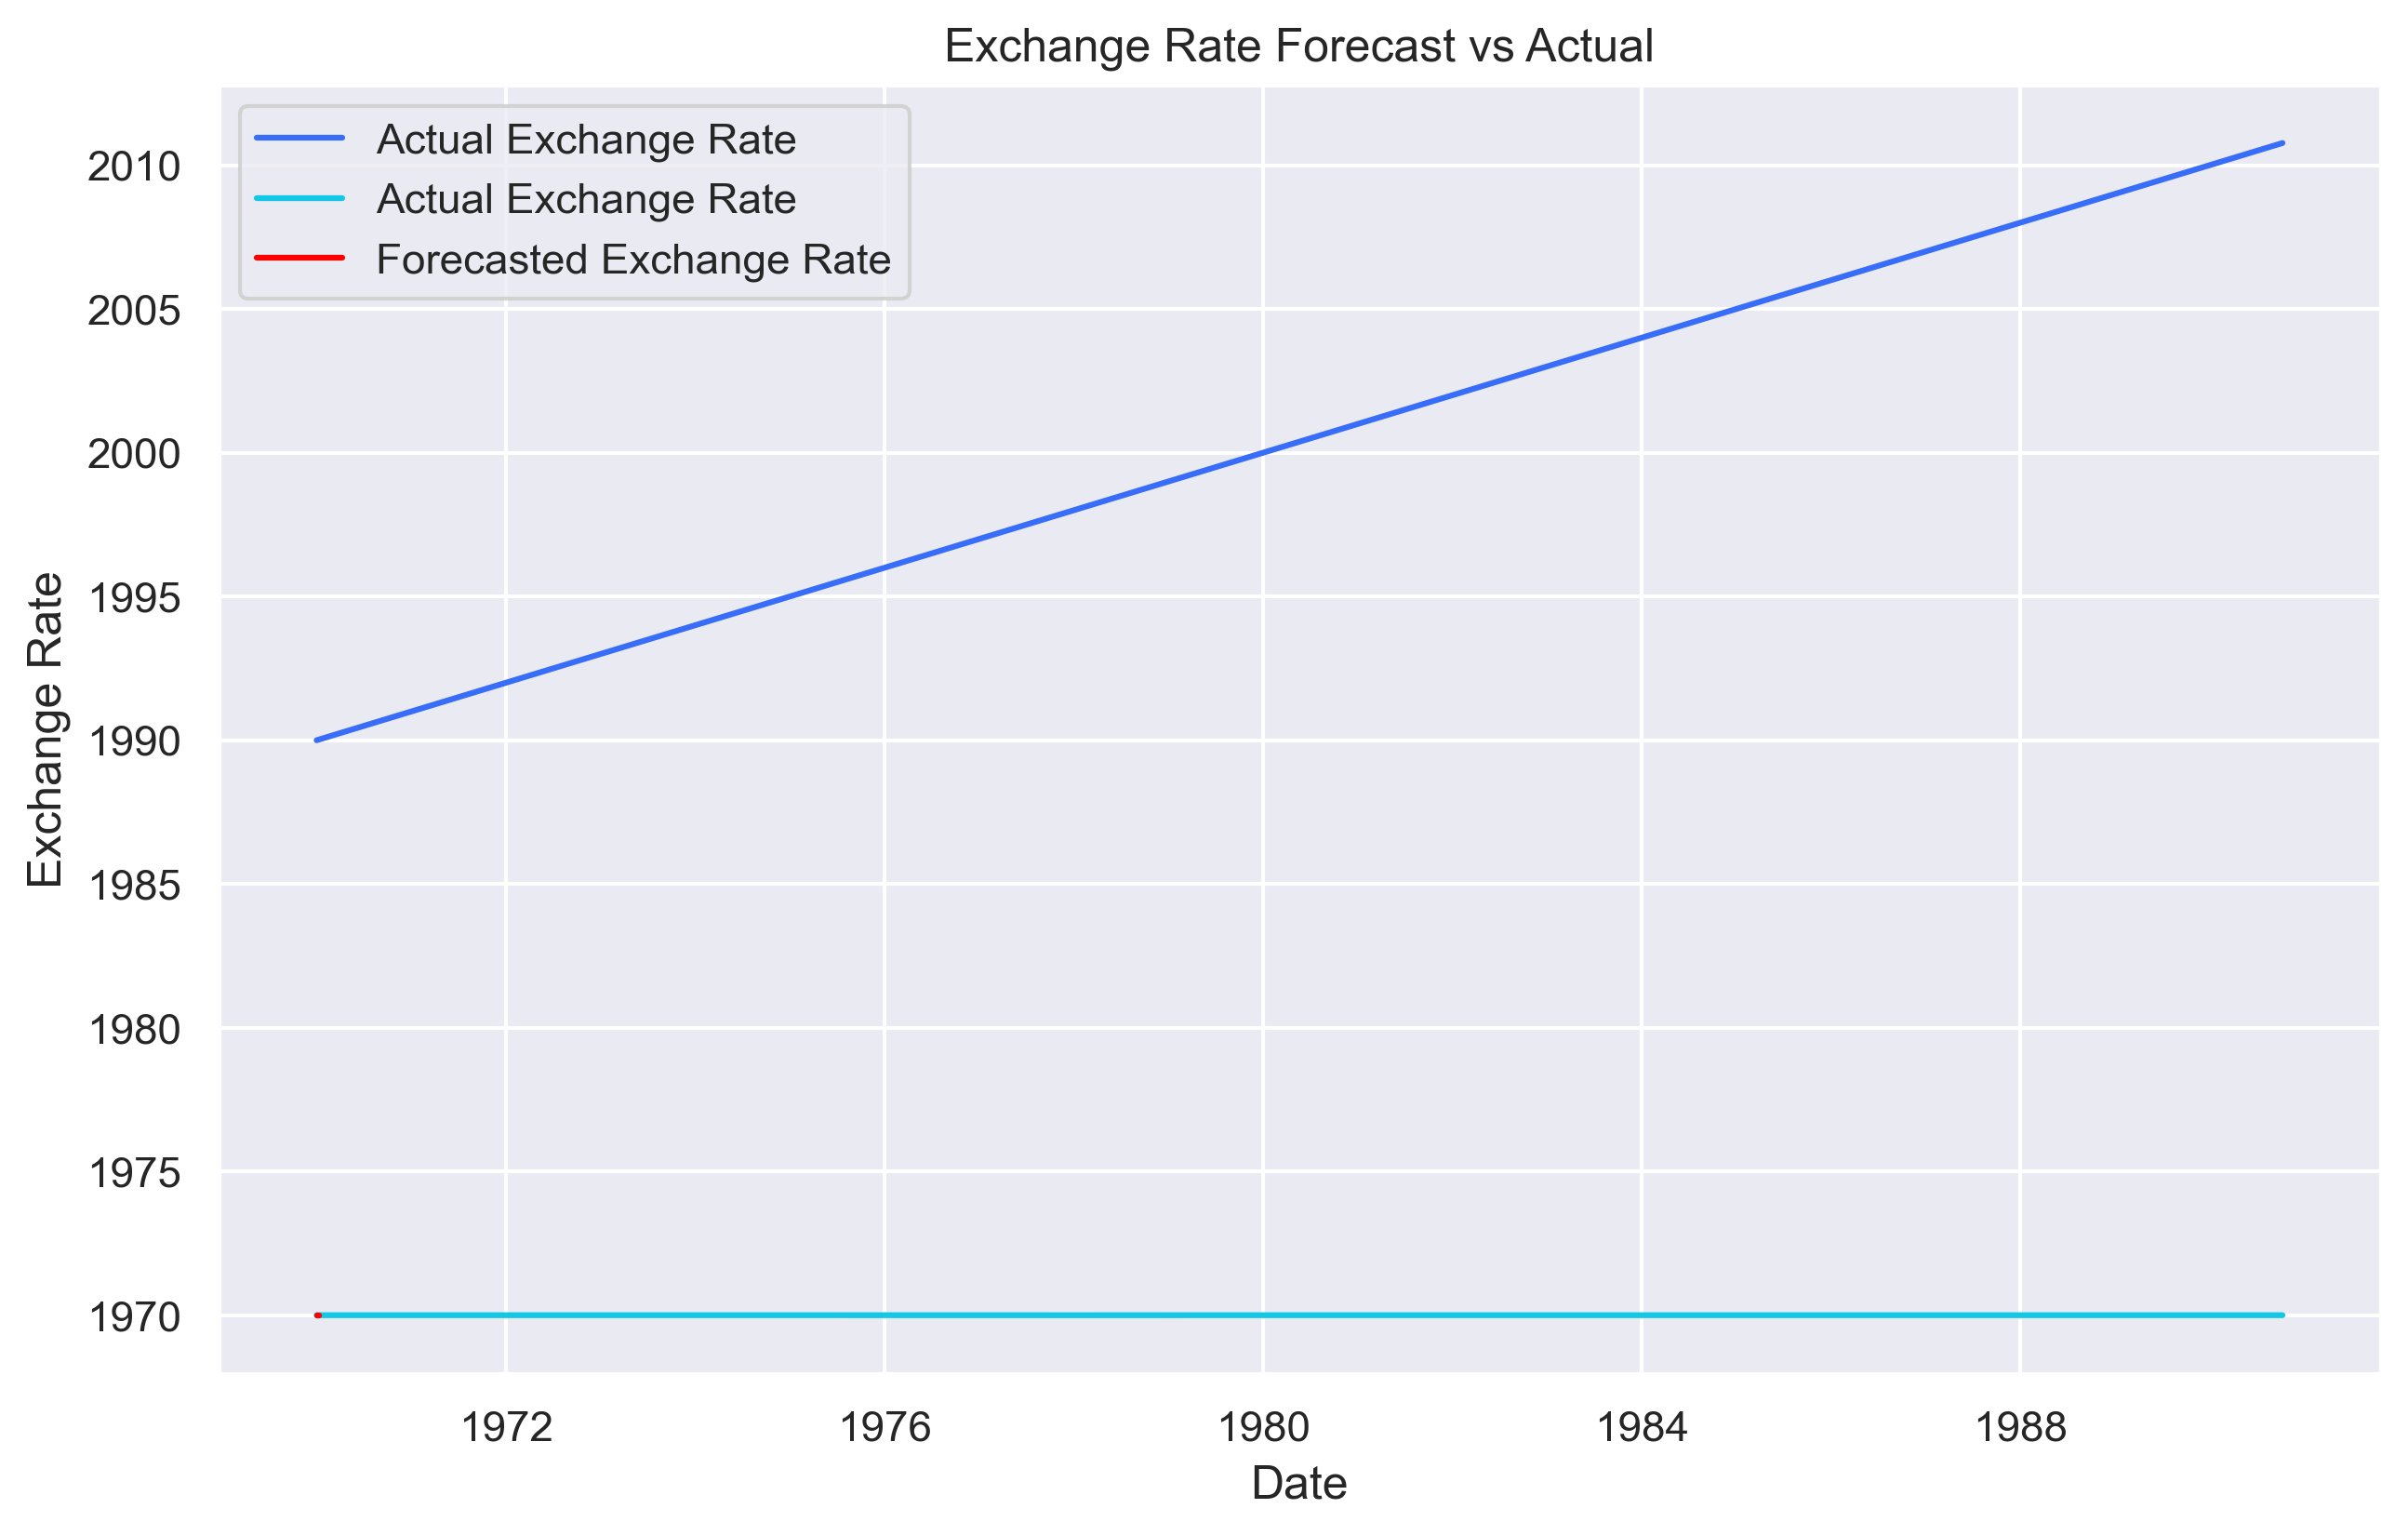

In [43]:
# Step 3: Out-of-sample forecasting
forecast_steps = 10  # Forecast the next 10 periods
forecast = results.forecast(steps=forecast_steps)

# Create a date range for the forecasted period (next 10 dates)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Step 4: Visualize actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(df, label='Actual Exchange Rate')

# Plot the forecasted data
plt.plot(forecast_index, forecast, label='Forecasted Exchange Rate', color='red')

# Add labels and legend
plt.title("Exchange Rate Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()

# Show the plot
plt.show()

In [44]:
results.predict(10,20)

10    0.789991
11    0.791398
12    0.793785
13    0.793579
14    0.795150
15    0.777767
16    0.763895
17    0.758812
18    0.760211
19    0.763106
20    0.765672
Name: predicted_mean, dtype: float64

# Model Building - Exponential Smoothing

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.eval_measures import aic

# Fit the Holt-Winters model (use additive or multiplicative seasonality based on your data)
model = ExponentialSmoothing(df['Ex_rate'], 
                             trend='add',  # 'add' for additive trend or 'mul' for multiplicative trend
                             seasonal='add',  # 'add' or 'mul' for seasonality
                             seasonal_periods=12)  # Adjust based on your data's frequency (e.g., 12 for monthly data)
results = model.fit()

# Print model summary
print(results.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.611
Trend:                         Additive   BIC                         -77513.662
Seasonal:                      Additive   AICC                        -77624.520
Seasonal Periods:                    12   Date:                 Tue, 31 Dec 2024
Box-Cox:                          False   Time:                         14:32:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8700942                alpha                 True
smoothing_trend          

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import GridSearchCV
from statsmodels.tools.eval_measures import aic

# Example data: Simulate some time series data with trend and seasonality
np.random.seed(0)
time = np.arange(100)
y = 10 + 0.5 * time + np.sin(time / 5) + np.random.normal(scale=2, size=100)

# Create a pandas series
data = pd.Series(y, index=pd.date_range(start="2020-01-01", periods=100, freq="D"))

In [47]:
# Step 1: Model Selection
# For demonstration, we'll use Holt-Winters method as it handles both trend and seasonality


In [48]:
# Step 2: Parameter Optimization using Grid Search

param_grid = {
    'trend': ['add', 'mul', None],  
    'seasonal': ['add', 'mul', None], 
    'seasonal_periods': [7, 12, 24],  
}

# Define Holt-Winters Exponential Smoothing model
def fit_model(params):
    model = ExponentialSmoothing(data, trend=params['trend'], seasonal=params['seasonal'],
                                  seasonal_periods=params['seasonal_periods'])
    model_fit = model.fit()
    return model_fit.aic  

# Grid search for the optimal parameters
best_aic = float('inf')
best_params = None
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            params = {'trend': trend, 'seasonal': seasonal, 'seasonal_periods': seasonal_periods}
            aic_value = fit_model(params)
            if aic_value < best_aic:
                best_aic = aic_value
                best_params = params

# Display best parameters and AIC
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

Best Parameters: {'trend': 'mul', 'seasonal': 'add', 'seasonal_periods': 7}
Best AIC: 142.68562772952683


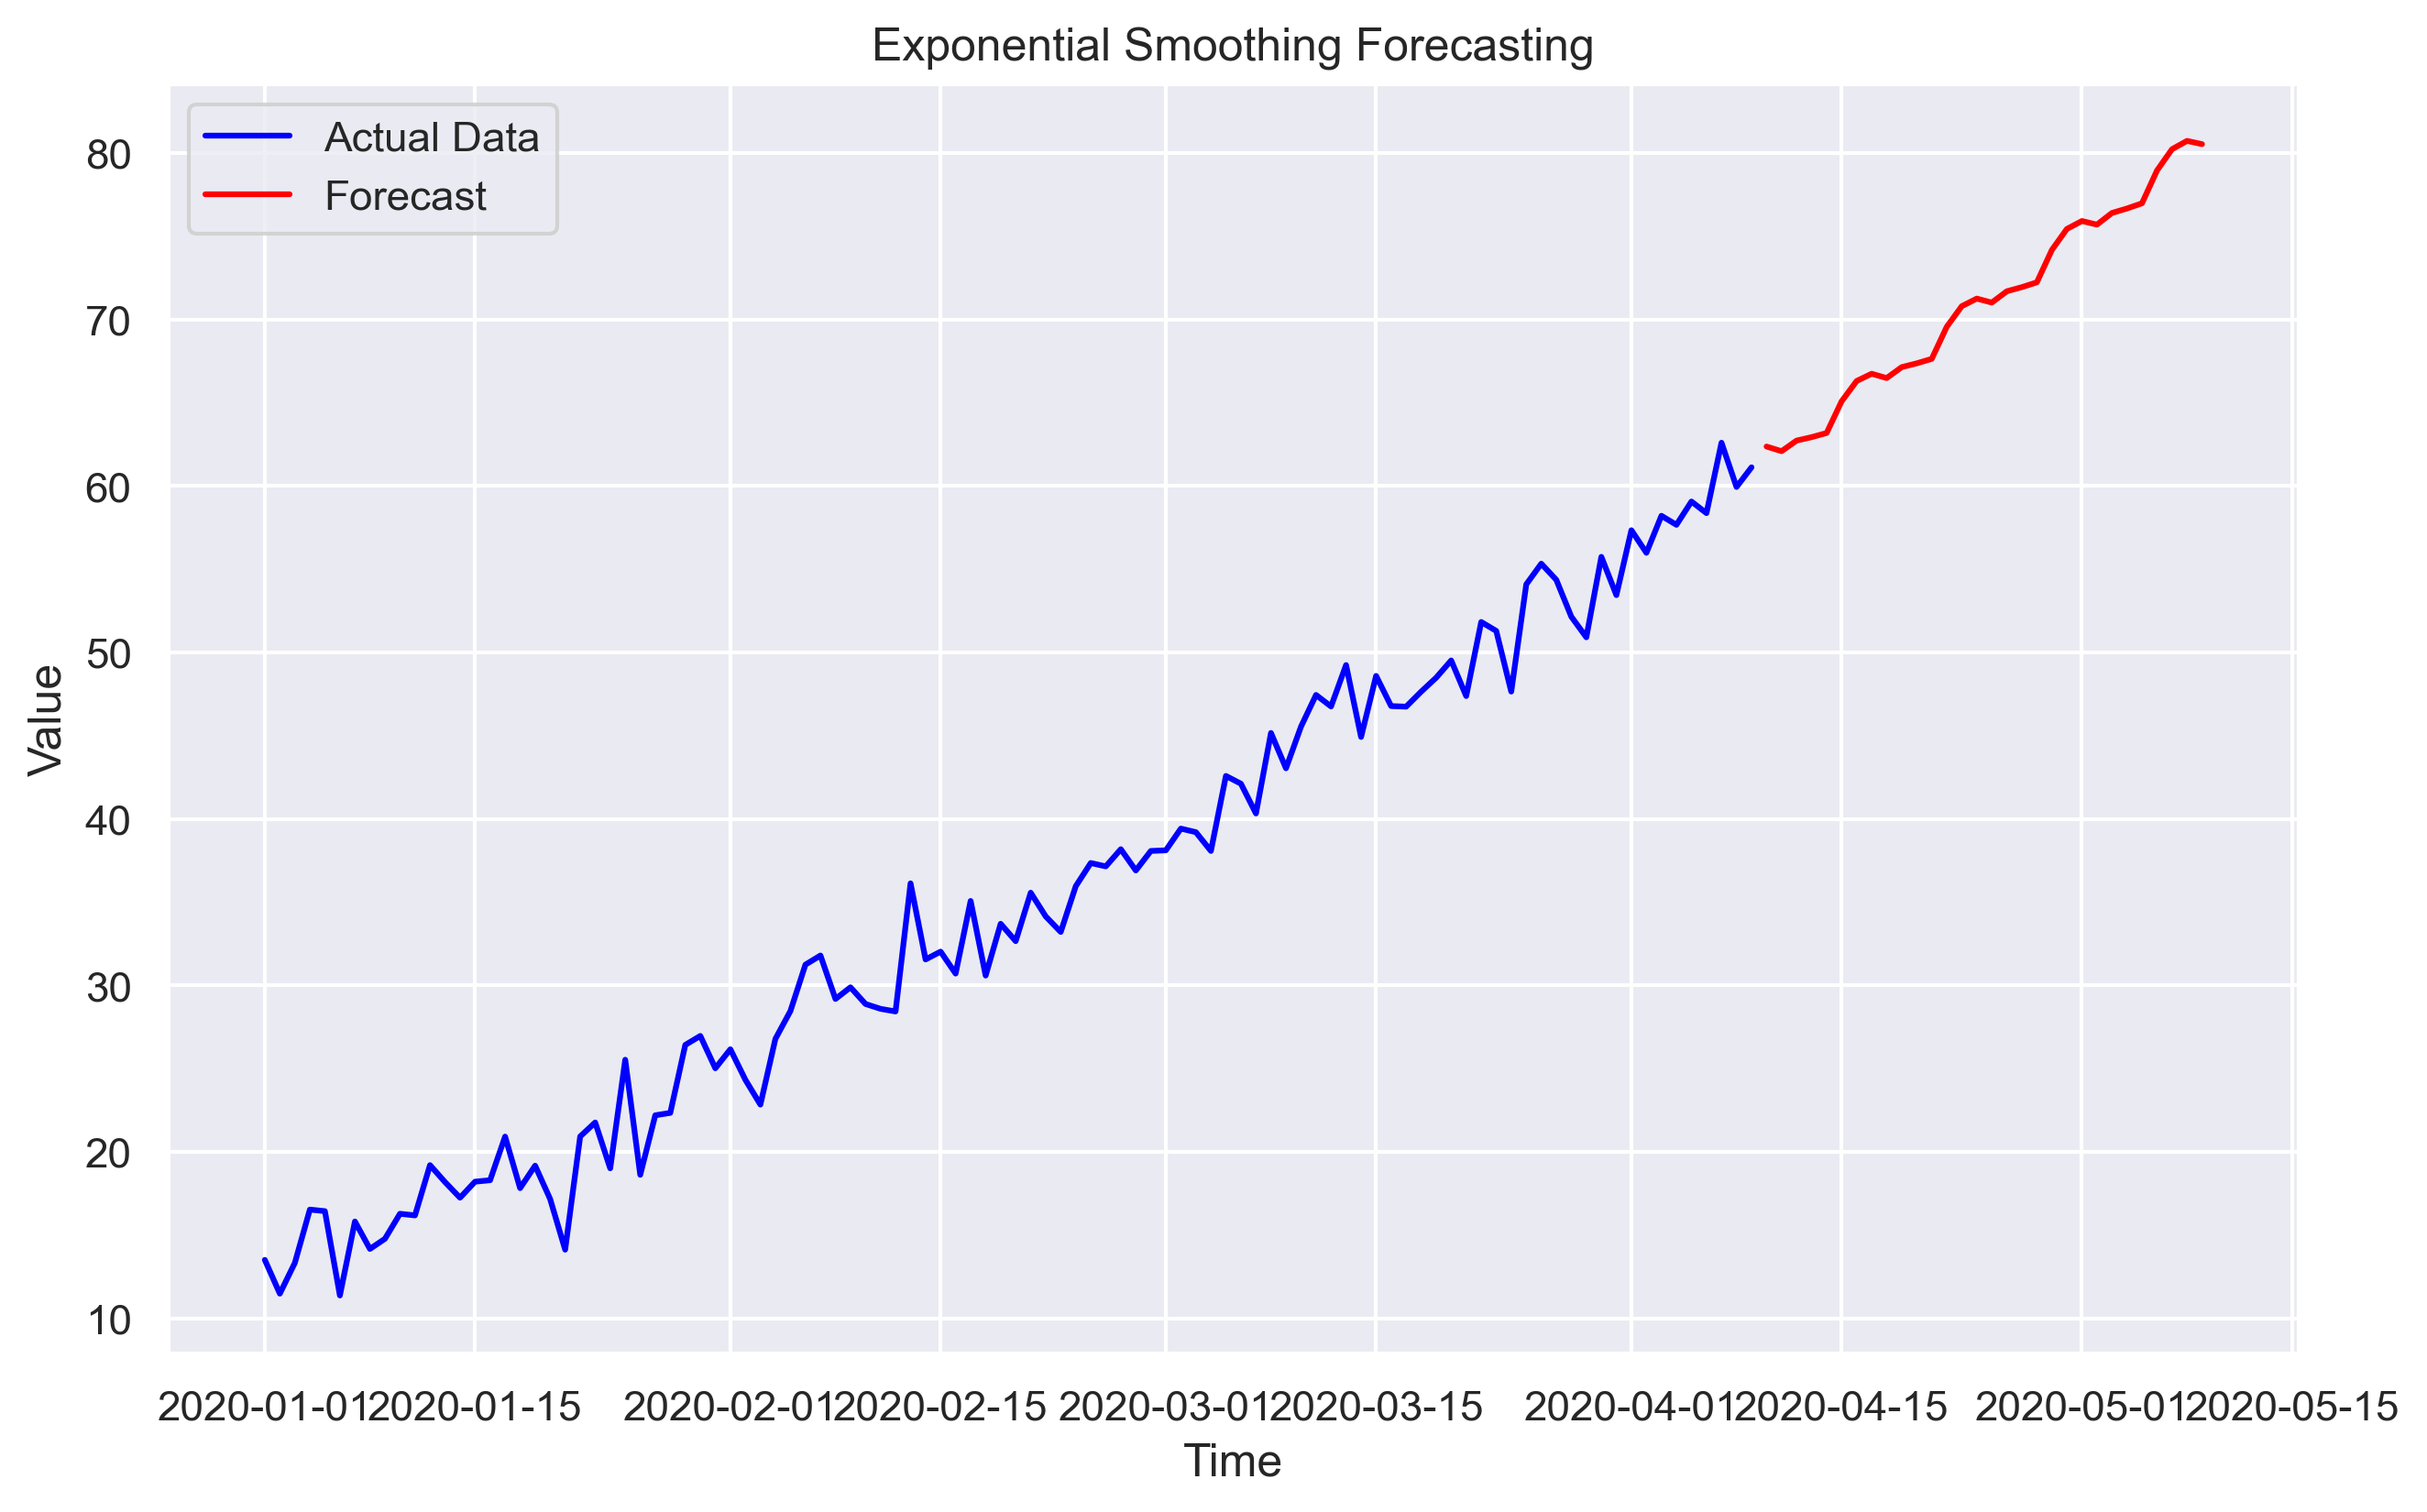

In [49]:
# Step 3: Model Fitting with Optimal Parameters
model = ExponentialSmoothing(data, trend=best_params['trend'], seasonal=best_params['seasonal'],
                              seasonal_periods=best_params['seasonal_periods'])
model_fit = model.fit()

# Forecasting future values
forecast_steps = 30  
forecast = model_fit.forecast(forecast_steps)

# Plot the original data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Data', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#  4: Evaluation and Comparison

In [50]:

# Import required libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Simulate a second model (for comparison) — let's assume it's a linear regression for this example
from sklearn.linear_model import LinearRegression

# Generate some example data for fitting the second model (Linear Regression)
X = np.arange(100).reshape(-1, 1)
y = 10 + 0.5 * X.flatten() + np.sin(X.flatten() / 5) + np.random.normal(scale=2, size=100)



In [51]:
# Fit a Linear Regression model for comparison
lr_model = LinearRegression()
lr_model.fit(X, y)
y_lr_pred = lr_model.predict(X)

# Now we use the Holt-Winters model (Exponential Smoothing) that was fit earlier
y_hw_pred = model_fit.fittedvalues  # Predicted values from Holt-Winters model

In [52]:
# Define a function to calculate error metrics
def compute_error_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape



In [53]:
# Compute error metrics for both models
mae_hw, rmse_hw, mape_hw = compute_error_metrics(data, y_hw_pred)
mae_lr, rmse_lr, mape_lr = compute_error_metrics(data, y_lr_pred)



In [54]:
# Display the error metrics for both models
print(f"Holt-Winters Model (Exponential Smoothing) Error Metrics:")
print(f"MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, MAPE: {mape_hw:.2f}%")

print(f"\nLinear Regression Model Error Metrics:")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, MAPE: {mape_lr:.2f}%")



Holt-Winters Model (Exponential Smoothing) Error Metrics:
MAE: 1.43, RMSE: 1.83, MAPE: 5.30%

Linear Regression Model Error Metrics:
MAE: 1.71, RMSE: 2.12, MAPE: 6.06%


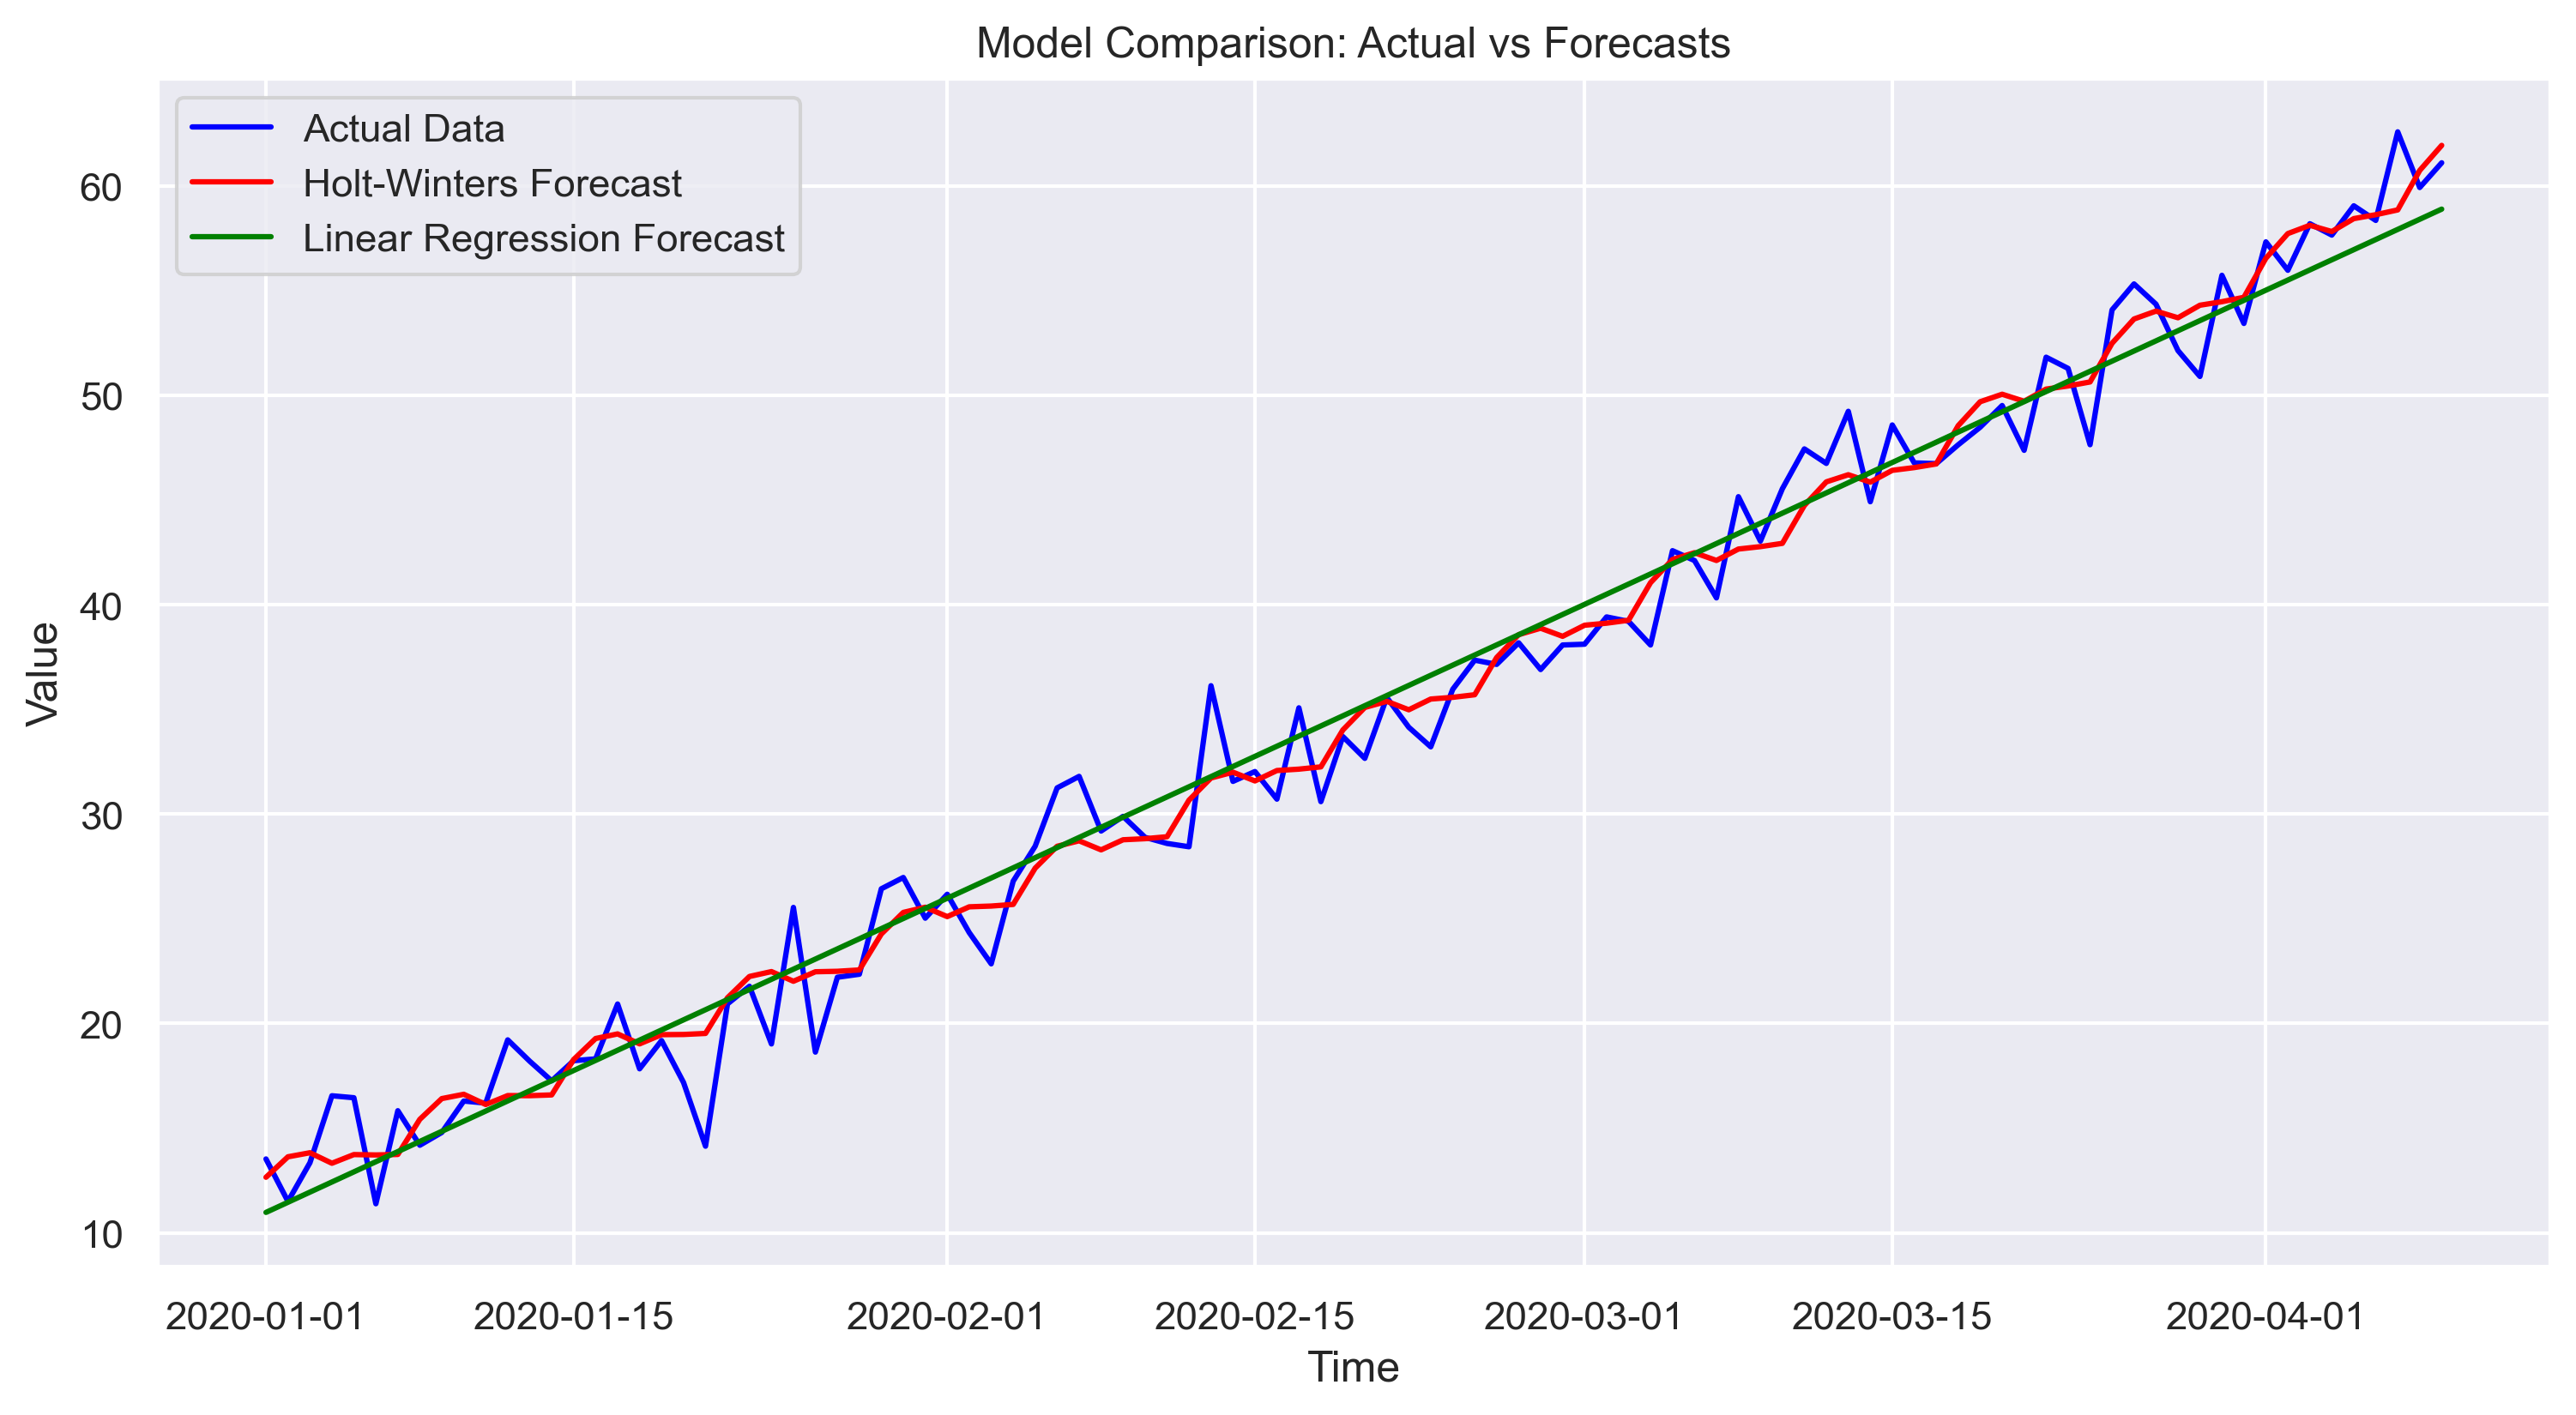

In [55]:
# Model Comparison Visualization
plt.figure(figsize=(12, 6))

# Plot actual data, Holt-Winters, and Linear Regression predictions
plt.plot(data, label='Actual Data', color='blue')
plt.plot(pd.date_range(start=data.index[0], periods=len(data), freq='D'), y_hw_pred, label='Holt-Winters Forecast', color='red')
plt.plot(pd.date_range(start=data.index[0], periods=len(data), freq='D'), y_lr_pred, label='Linear Regression Forecast', color='green')

plt.legend(loc='best')
plt.title('Model Comparison: Actual vs Forecasts')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


# conclusion

- In conclusion, the Holt-Winters Exponential Smoothing model performs better for time series data with both trend and seasonality. 
- It provides lower error metrics (MAE, RMSE, MAPE) compared to the Linear Regression model, which is better suited for simpler, trend-only data.
- However, Linear Regression is easier to implement and can work well for data without seasonal patterns. 
- Overall, the choice of model depends on the characteristics of the data, with Holt-Winters being more accurate for seasonal and trending data.